In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings

In [2]:
def make_coordinates(img, line_para):
    slope, intercept = line_para
    try:
        y1 = img.shape[0]
        y2 = int(y1*(3.6/5))
        x1 = int((y1 - intercept)/slope)
        x2 = int((y2 - intercept)/slope)
        
        return np.array([x1, y1, x2, y2])
    except OverflowError:
        print("OverflowError")

In [3]:
left_ln = []
right_ln = []

In [4]:
def avg_line_img(image, lines):
    left_fit = []
    right_fit = []
    
    try:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)

            para = np.polyfit((x1, x2), (y1, y2), 1)
            
            if abs(para[0]) > 0.001:
#                 print(para[0])
                
                slope = para[0]
                intercept = para[1]

                if slope < 0:
                    left_fit.append((slope, intercept))
                else:
                    right_fit.append((slope, intercept))
    
        left_fit_avg = np.average(left_fit, axis = 0)
        right_fit_avg = np.average(right_fit, axis = 0)

        left_ln.append(left_fit_avg)
        if str(type(right_fit_avg)) == "<class 'numpy.float64'>":
            right_ln.append(right_ln[-1])
        else:
            right_ln.append(right_fit_avg)

#         print(right_ln)

        if str(type(right_fit_avg)) == "<class 'numpy.float64'>":
            right_fit_avg = right_ln[-1]
#             print("yesssssss",right_fit_avg)

        left_line = make_coordinates(image, left_fit_avg)
        right_line = make_coordinates(image, right_fit_avg)
    
    
        return np.array([left_line, right_line])
    except TypeError:
        print("typeError")

In [5]:
def cannyDet(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 30, 110)
    return canny

In [6]:
def display(image, lines):
    line_image = np.zeros_like(image)
    try:
        if lines is not None:
            for x1, y1, x2, y2 in lines:
                try:
                    cv2.line(image, (x1, y1), (x2, y2), (0, 150, 255), 3)
                except OverflowError:
                    print("Overflowerror")
        return line_image
    except TypeError:
        print("TypeError")

In [7]:
def RoI(image):
    height = image.shape[0]
    width = image.shape[1]
    poly = np.array([
        [ (100,height),(width, height), (620, 350)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, poly, 255)
    masked_img = cv2.bitwise_and(image, mask)
    return masked_img

In [8]:
image = cv2.imread("data/image/dcam2.jpg")
lane_image = np.copy(image)
canny_img = cannyDet(lane_image)
cropped_img = RoI(canny_img)
lines = cv2.HoughLinesP(cropped_img, 2, np.pi/150, 100, np.array([]), minLineLength=40, maxLineGap = 10)
avg_lines = avg_line_img(lane_image, lines)
line_image = display(lane_image, avg_lines)
combo = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

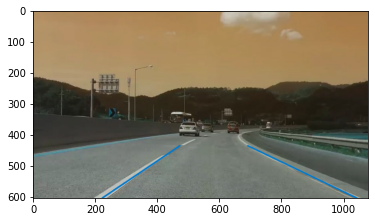

In [9]:
plt.imshow(combo)

In [ ]:
cv2.imshow("image", combo)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture("data/HighWayRoad.mp4")

In [ ]:
# while cap.isOpened():
#     warnings.simplefilter('ignore', np.RankWarning)
#     _, frame = cap.read()
#     canny_img = cannyDet(frame)
#     cropped_img = RoI(canny_img)
#     lines = cv2.HoughLinesP(cropped_img, rho=3, theta=np.pi/160, threshold=50, lines=np.array([]), minLineLength=35, maxLineGap = 6)
#     avg_lines = avg_line_img(frame, lines)
#     line_image = display(frame, avg_lines)
#     combo = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
#     cv2.imshow("image", combo)
#     cv2.waitKey(1)